# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-04-24 14:43:16 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

NameError: ignored

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [1]:
import Pkg; Pkg.add("DSP")
using DSP

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IrrationalConstants ─ v0.2.2
   Installed IterTools ─────────── v1.4.0
   Installed MKL_jll ───────────── v2022.2.0+0
   Installed MakieCore ─────────── v0.6.3
   Installed MutableArithmetics ── v1.2.3
   Installed FFTW ──────────────── v1.6.0
   Installed RecipesBase ───────── v1.3.3
   Installed Reexport ──────────── v1.2.2
   Installed AbstractFFTs ──────── v1.3.1
   Installed SpecialFunctions ──── v2.2.0
   Installed LogExpFunctions ───── v0.3.23
   Installed DSP ───────────────── v0.7.8
   Installed Polynomials ───────── v3.2.9
   Installed ChainRulesCore ────── v1.15.7
   Installed IntelOpenMP_jll ───── v2023.1.0+0
   Installed Observables ───────── v0.5.4
   Installed FFTW_jll ──────────── v3.3.10+0
   Installed InverseFunctions ──── v0.1.8
   Installed OpenSpecFun_jll ───── v0.5.5+0
   Installed DocStringExtensions ─ v0.9.3
   Installed Compat ────────────── v4.6.1
   Insta

In [2]:
import Pkg; Pkg.add("Distributions")
using Distributions

   Resolving package versions...
   Installed DualNumbers ───────────── v0.6.8
   Installed Calculus ──────────────── v0.5.1
   Installed Rmath ─────────────────── v0.7.1
   Installed HypergeometricFunctions ─ v0.3.15
   Installed StatsFuns ─────────────── v1.3.0
   Installed PDMats ────────────────── v0.11.17
   Installed DataAPI ───────────────── v1.14.0
   Installed NaNMath ───────────────── v1.0.2
   Installed OrderedCollections ────── v1.6.0
   Installed Rmath_jll ─────────────── v0.4.0+0
   Installed FillArrays ────────────── v1.0.0
   Installed QuadGK ────────────────── v2.8.2
   Installed DataStructures ────────── v0.18.13
   Installed StatsAPI ──────────────── v1.6.0
   Installed SortingAlgorithms ─────── v1.1.0
   Installed Missings ──────────────── v1.1.0
   Installed DensityInterface ──────── v0.4.0
   Installed StatsBase ─────────────── v0.33.21
   Installed Distributions ─────────── v0.25.87
    Updating `~/.julia/environments/v1.8/Project.toml`
  [31c24e10] + Distributio

In [3]:
import Pkg; Pkg.add("Plots")
using Plots

   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v2.1.91+0
   Installed GR_jll ─────────────────────── v0.72.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LoggingExtras ──────────────── v1.0.0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed Measures ───────────────────── v0.3.2
   Installed Grisu ──────────────────────── v1.0.2
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Formatting ─────────────────── v0.4.2
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed RecipesPipeline ────────────── v0.6.11
   Installed PlotUtils ──────────────────── v1.3.4
   Installed OpenSSL ────────────────────── v1.3.5
   Installed Xorg_libpthr

In [4]:
import Pkg; Pkg.add("WAV")
using WAV

   Resolving package versions...
   Installed WAV ──── v1.2.0
   Installed FileIO ─ v1.16.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [8149f6b0] + WAV v1.2.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [5789e2e9] + FileIO v1.16.0
  [8149f6b0] + WAV v1.2.0
Precompiling project...
  ✓ FileIO
  ✓ WAV
  2 dependencies successfully precompiled in 4 seconds. 164 already precompiled.


## **Item a)**

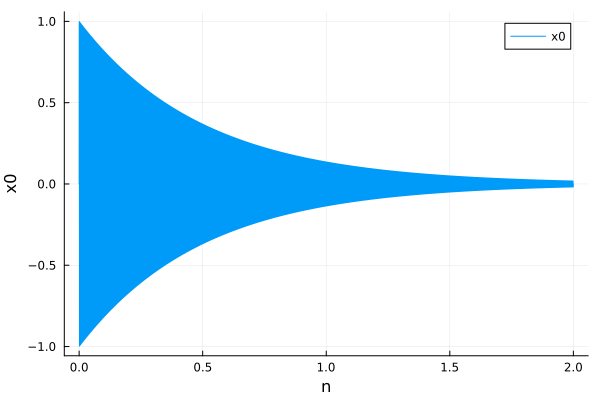

In [5]:
N = 80000
n = (0:N-1)./(N/2)
Omega = 2*pi*500
tau = 0.5

x0 = sin.(Omega.*n).^3 .* exp.(-n./tau)

plot(n, x0, label = "x0", xlabel = "n", ylabel = "x0")

In [29]:
F = fftplot(x0)
plot(F)

LoadError: ignored

In [6]:
wavplay(x0, 40000)

LoadError: ignored

## **Item b)**

In [7]:
sigma = sqrt(mean(x0.^2)/10)

0.06248949867777274

In [8]:
10*log10(mean(x0.^2)/sigma.^2)

10.0

In [9]:
Noise_Dist = Normal(0, sigma)
Noise = rand(Noise_Dist, length(x0))

x = x0 .+ Noise

plot(n, [x x0])

Output hidden; open in https://colab.research.google.com to view.

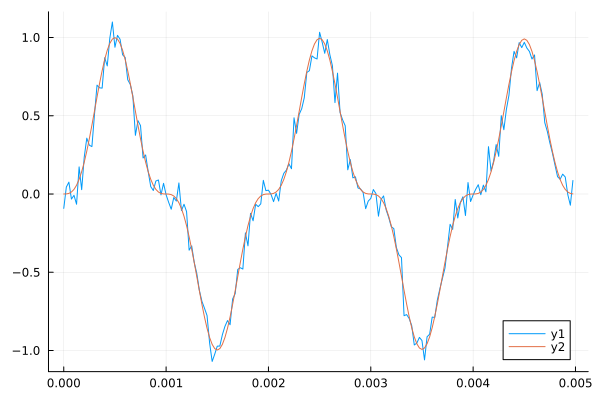

In [10]:
plot(n[1:200], [x[1:200] x0[1:200]])

## **Item c)**

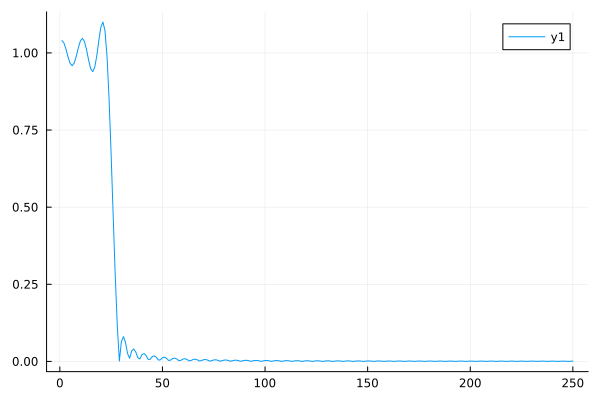

In [26]:
n = 0:100
h = 0.1.*sinc.(0.1.*(n.-50)) 

a = [1]
b = h

H = PolynomialRatio(b, a)

Hfreq = freqz(H)

plot(abs.(Hfreq))

In [27]:
y0 = filt(H, x0)
y = filt(H, x)

plot([y y0])

Output hidden; open in https://colab.research.google.com to view.